<div style="text-align: center;">

# <strong>Atividade 7: Partial Dependence Plots (PDPs)</strong>

#### Tópicos Avançados em IC 2 - 2024.2

#### Universidade Federal de Pernambuco (UFPE)

---

**Aluna:** Bruna Zamith Santos  

**Professor:** Dr. Ricardo Prudêncio

**Data:** 17/09/2024

---

</div>


# <a id="TOC">Tabela de Conteúdos</a>

- [**1. Introdução**](#Introducao)
- [**2. Bibliotecas**](#Bibliotecas)
- [**3. Conjunto de Dados**](#ConjuntoDados)
- [**4. Modelo Black-Box**](#BlackBox)
- [**5. Feature Importance**](#FI)
- [**6. Partial Dependence Plots (PDPs)**](#PDP)
---

# <a id="Introducao">1. Introdução</a>
*Voltar à [Tabela de Conteúdos](#TOC)*

Este notebook visa resolver a atividade proposta, com o seguinte enunciado:

> (a). Faça a leitura de uma base de dados e separe seus dados de treinamento e teste;

> (b). Treine um modelo caixa-preta (e.g., Random Forest, MLP, kNN, SVC).

> (c). Aplique Feature Importance e construa PDPs para as três variáveis consideradas mais importante.

---

# <a id="Bibliotecas">2. Bibliotecas</a>
*Voltar à [Tabela de Conteúdos](#TOC)*

In [1]:
# Descomente a linha a seguir, se for rodar no seu computador!

# !pip3 install matplotlib numpy pandas scikit-learn

In [2]:
from IPython.display import HTML

import matplotlib.pyplot as plt

import numpy as np

import pandas as pd

from sklearn.inspection import PartialDependenceDisplay, permutation_importance
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

---

# <a id="ConjuntoDados">3. Conjunto de Dados</a>
*Voltar à [Tabela de Conteúdos](#TOC)*

A conjunto de dados escolhido foi o *"Predict Students' Dropout and Academic Success"*, do UCI ([link](https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success)). 

Ele advém do paper [*"Early prediction of student's performance in higher education: a case study"*](https://link.springer.com/chapter/10.1007/978-3-030-72657-7_16), de Mónica V. Martins, Daniel Tolledo, Jorge Machado, Luís M. T. Baptista, e Valentim Realinho. 2021. Publicado em *"Trends and Applications in Information Systems and Technologies"*.

A descrição dele é dada como:

> Um conjunto de dados criado a partir de uma instituição de ensino superior (adquirido de vários bancos de dados distintos) relacionado a estudantes matriculados em diferentes cursos de graduação, como agronomia, design, educação, enfermagem, jornalismo, gestão, serviço social e tecnologias. O conjunto de dados inclui informações conhecidas no momento da matrícula dos estudantes (caminho acadêmico, dados demográficos e fatores socioeconômicos) e o desempenho acadêmico dos estudantes ao final do primeiro e do segundo semestres. Os dados são usados para construir modelos de classificação para prever a evasão e o sucesso acadêmico dos estudantes. O problema é formulado como uma tarefa de classificação em três categorias, na qual há um forte desequilíbrio em direção a uma das classes.

A descrição de cada uma das features pode ser encontrada na [página do UCI](https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success).

In [3]:
df = pd.read_csv('data.csv', sep=';')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [5]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [6]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [7]:
df.Target.value_counts()

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

<div style="border: 1px solid #007BFF; border-radius: 5px; padding: 10px; background-color: #f0f8ff;">
Temos 3 classes distintas nesse caso: Graduate, Dropout e Enrolled.

No entanto, optei por excluir os alunos cujo status é "Enrolled", afinal eles ainda estão passíveis de evadirem ("Dropout").

Portanto, com base na suposição acima, posso tratar o target como binário, removendo todos os exemplos de "Enrolled". Por fim, converti a coluna "Target": "Graduate" para 0 (negativo) e "Dropout" para 1 (positivo).
</div>

In [8]:
df = df[df.Target.isin(['Graduate', 'Dropout'])].reset_index(drop=True)
df['Target'] = df.Target.map({'Graduate': 0, 'Dropout': 1})
df.shape

(3630, 37)

In [9]:
X = df.drop(columns=['Target'])
y = df.Target

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

---

# <a id="BlackBox">4. Modelo Black-Box</a>
*Voltar à [Tabela de Conteúdos](#TOC)*

<div style="border: 1px solid #007BFF; border-radius: 5px; padding: 10px; background-color: #f0f8ff;">
Como optei pelo algoritmo Support-Vector Machine Classifier (SVC) para meu modelo Black-Box, é necessário normalizar as features, já que o algoritmo é sensível às suas escalas. Assim, crio a pipeline que incorpora essa transformação.
</div>

In [11]:
model = make_pipeline(
    StandardScaler(),
    SVC(
        kernel='rbf',
        C=2,
        probability = True
    )
).fit(X_train, y_train)

In [12]:
y_preds_train = model.predict(X_train)
y_preds_test = model.predict(X_test)

In [13]:
# Train
print(classification_report(y_train, y_preds_train))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1645
           1       0.98      0.88      0.93      1077

    accuracy                           0.95      2722
   macro avg       0.96      0.94      0.94      2722
weighted avg       0.95      0.95      0.95      2722



In [14]:
# Test
print(classification_report(y_test, y_preds_test))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       564
           1       0.94      0.82      0.88       344

    accuracy                           0.91       908
   macro avg       0.92      0.89      0.90       908
weighted avg       0.91      0.91      0.91       908



<div style="border: 1px solid #007BFF; border-radius: 5px; padding: 10px; background-color: #f0f8ff;">
O SVC obteve um resultado igual a 0.91 para wighted f1-score no teste (vs 0.95 no treino), o que considerei satisfatório. Além disso, não há indicativo de overfitting. Logo, continuarei com a análise do PDP.
</div>

---

# <a id="FI">5. Feature Importance</a>
*Voltar à [Tabela de Conteúdos](#TOC)*

In [15]:
def plot_permutation_importance(clf, X, y, ax):
    result = permutation_importance(clf, X, y, n_repeats=10, random_state=42, n_jobs=2)
    perm_sorted_idx = result.importances_mean.argsort()

    ax.boxplot(
        result.importances[perm_sorted_idx].T,
        vert=False,
        labels=X.columns[perm_sorted_idx],
    )
    ax.axvline(x=0, color="k", linestyle="--")
    return ax

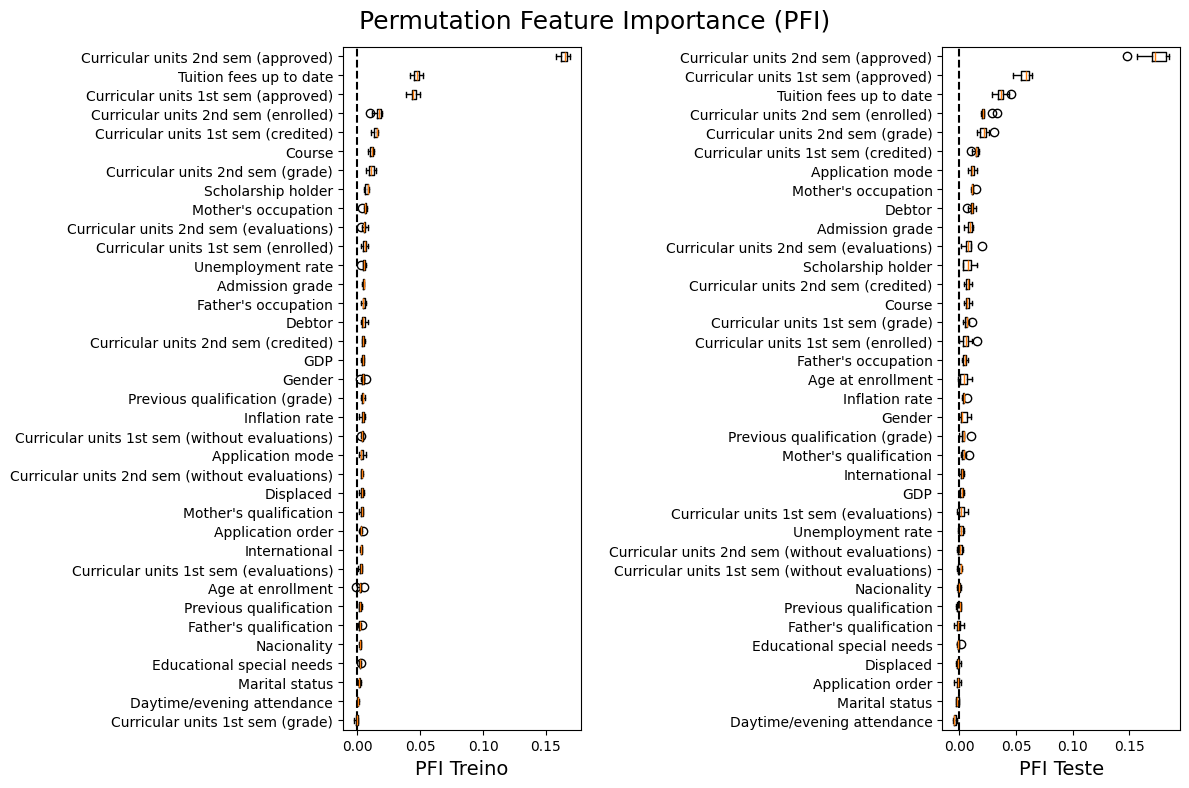

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

plot_permutation_importance(model, X_train, y_train, ax1)
ax1.set_xlabel("PFI Treino", fontsize=14)
plot_permutation_importance(model, X_test, y_test, ax2)
ax2.set_xlabel("PFI Teste", fontsize=14)

fig.suptitle(
    f"Permutation Feature Importance (PFI)",
    fontsize=18
)
_ = fig.tight_layout()

<div style="border: 1px solid #007BFF; border-radius: 5px; padding: 10px; background-color: #f0f8ff;">
De acordo com os PFIs acima, selecionei as features "Curricular units 2nd sem (approved)", "Tuition fees up to date" e "Curricular units 1st sem (approved)".
</div>

In [17]:
selected_features = [
    "Curricular units 2nd sem (approved)",
    "Tuition fees up to date",
    "Curricular units 1st sem (approved)"
]

---

# <a id="PDP">6. Partial Dependence Plots (PDPs)</a>
*Voltar à [Tabela de Conteúdos](#TOC)*

In [18]:
selected_features_index = [-1]*len(selected_features)

for i, selected_feature in enumerate(selected_features):
    for j, col in enumerate(list(X.columns)):
        if col == selected_feature:
            selected_features_index[i] = j

selected_features_index

[30, 16, 24]

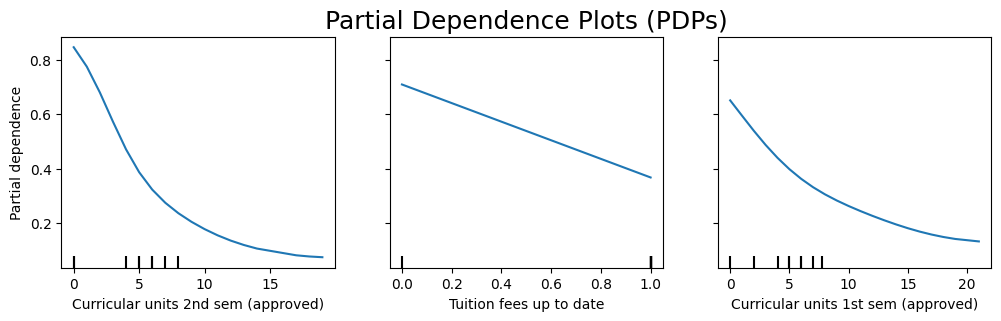

In [19]:
fig, ax = plt.subplots(figsize=(12, 3))
ax.set_title("Partial Dependence Plots (PDPs)", fontsize=18)
PartialDependenceDisplay.from_estimator(
    model,
    X_test,
    selected_features_index,
    grid_resolution=100,
    ax=ax,
    random_state=42
);

---